In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model

In [2]:
## Data 
filenames = 'B0005_data_x_train.csv'
x_train = np.loadtxt('B0005_data_x_train.csv', delimiter=',')
filenames = 'B005_data_y_train.csv'
y_train = np.loadtxt('B005_data_y_train.csv', delimiter=',')

filenames = 'B0005_data_x_test.csv'
x_test = np.loadtxt('B0005_data_x_test.csv', delimiter=',')

filenames = 'B005_data_y_test.csv'
y_test = np.loadtxt('B005_data_y_test.csv', delimiter=',')

x_train = np.array(x_train,dtype =float)
y_train = np.array(y_train,dtype =float)
x_test = np.array(x_test,dtype =float)
y_test = np.array(y_test,dtype =float)
x_train.shape

(100, 6)

In [3]:
x_train = x_train.reshape(100,6,1)
x_test = x_test.reshape(40,6,1)

In [4]:
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test
x_train.shape

(100, 6, 1)

In [5]:
# RNN 
# model = Sequential()
# model.add(LSTM((1),batch_input_shape=(None,6,1),return_sequences=True))# 1means 1output None means do not indictate, it will match by the dataset input
# model.add(Dropout(0.2))
# model.add(LSTM((1),batch_input_shape=(None,6,1),return_sequences=False))
# model.add(Dropout(0.2))
# model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
# # model.summary()

# model = Sequential()
# model.add(LSTM((1),batch_input_shape=(None,6,1),return_sequences=True))# 1means 1output None means do not indictate, it will match by the dataset input
# model.add(LSTM((1),batch_input_shape=(None,6,1),return_sequences=False))
# model.add(Dense(8))
# model.add(Dense(8))
# model.add(Dense(8))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
# model.summary()

model = Sequential()
model.add(LSTM((1),batch_input_shape=(None,6,1),return_sequences=True))# 1means 1output None means do not indictate, it will match by the dataset input
model.add(LSTM((1),batch_input_shape=(None,6,1),return_sequences=False))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 1)              12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9

In [6]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Epoch 1/2000
4/4 [==============================] - 64s 989ms/step - loss: 0.7351 - accuracy: 0.0000e+00 - val_loss: 0.1821 - val_accuracy: 0.0000e+00
Epoch 2/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.7021 - accuracy: 0.0000e+00 - val_loss: 0.1406 - val_accuracy: 0.0000e+00
Epoch 3/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.6525 - accuracy: 0.0000e+00 - val_loss: 0.0980 - val_accuracy: 0.0000e+00
Epoch 4/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.5936 - accuracy: 0.0000e+00 - val_loss: 0.0695 - val_accuracy: 0.0000e+00
Epoch 5/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.5334 - accuracy: 0.0000e+00 - val_loss: 0.0611 - val_accuracy: 0.0000e+00
Epoch 6/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.4852 - accuracy: 0.0000e+00 - val_loss: 0.0803 - val_accuracy: 0.0000e+00
Epoch 7/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.4364 - accuracy: 0.0000e+00 -

Epoch 57/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.1737 - accuracy: 0.0155 - val_loss: 0.4770 - val_accuracy: 0.0000e+00
Epoch 58/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.1946 - accuracy: 0.0155 - val_loss: 0.5061 - val_accuracy: 0.0000e+00
Epoch 59/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.1913 - accuracy: 0.0092 - val_loss: 0.5250 - val_accuracy: 0.0000e+00
Epoch 60/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.1925 - accuracy: 0.0040 - val_loss: 0.5292 - val_accuracy: 0.0000e+00
Epoch 61/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.1824 - accuracy: 0.0155 - val_loss: 0.5203 - val_accuracy: 0.0000e+00
Epoch 62/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.1921 - accuracy: 0.0000e+00 - val_loss: 0.5123 - val_accuracy: 0.0000e+00
Epoch 63/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.1943 - accuracy: 0.0061 - val_loss: 0.4996 -

Epoch 113/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.1222 - accuracy: 0.0000e+00 - val_loss: 0.1477 - val_accuracy: 0.0000e+00
Epoch 114/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.1083 - accuracy: 0.0092 - val_loss: 0.0931 - val_accuracy: 0.0000e+00
Epoch 115/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.1087 - accuracy: 0.0061 - val_loss: 0.0818 - val_accuracy: 0.0000e+00
Epoch 116/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.1208 - accuracy: 0.0155 - val_loss: 0.1062 - val_accuracy: 0.0000e+00
Epoch 117/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.1190 - accuracy: 0.0155 - val_loss: 0.0962 - val_accuracy: 0.0000e+00
Epoch 118/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.1205 - accuracy: 0.0092 - val_loss: 0.0607 - val_accuracy: 0.0000e+00
Epoch 119/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0979 - accuracy: 0.0155 - val_loss: 0

4/4 [==============================] - 0s 25ms/step - loss: 0.0908 - accuracy: 0.0092 - val_loss: 0.0383 - val_accuracy: 0.0000e+00
Epoch 169/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.1097 - accuracy: 0.0092 - val_loss: 0.0471 - val_accuracy: 0.0000e+00
Epoch 170/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0985 - accuracy: 0.0155 - val_loss: 0.0236 - val_accuracy: 0.0000e+00
Epoch 171/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.1105 - accuracy: 0.0155 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 172/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0971 - accuracy: 0.0092 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 173/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0949 - accuracy: 0.0155 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 174/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0916 - accuracy: 0.0155 - val_loss: 0.0209 - val_accurac

Epoch 224/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.1049 - accuracy: 0.0040 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 225/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0913 - accuracy: 0.0155 - val_loss: 0.0344 - val_accuracy: 0.0000e+00
Epoch 226/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.1048 - accuracy: 0.0155 - val_loss: 0.0279 - val_accuracy: 0.0000e+00
Epoch 227/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0871 - accuracy: 0.0092 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 228/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.1042 - accuracy: 0.0092 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 229/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.1020 - accuracy: 0.0155 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 230/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0933 - accuracy: 0.0061 - val_loss: 0.009

Epoch 280/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0872 - accuracy: 0.0061 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 281/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0869 - accuracy: 0.0155 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 282/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0902 - accuracy: 0.0092 - val_loss: 0.0345 - val_accuracy: 0.0000e+00
Epoch 283/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0932 - accuracy: 0.0092 - val_loss: 0.0272 - val_accuracy: 0.0000e+00
Epoch 284/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0899 - accuracy: 0.0155 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 285/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0965 - accuracy: 0.0061 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 286/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0918 - accuracy: 0.0155 - val_loss: 0.043

Epoch 336/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0926 - accuracy: 0.0092 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 337/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0782 - accuracy: 0.0092 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 338/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0649 - accuracy: 0.0092 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 339/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0937 - accuracy: 0.0092 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 340/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0910 - accuracy: 0.0061 - val_loss: 0.0278 - val_accuracy: 0.0000e+00
Epoch 341/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0812 - accuracy: 0.0092 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 342/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0729 - accuracy: 0.0155 - val_loss: 0.021

Epoch 392/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0815 - accuracy: 0.0061 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 393/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0862 - accuracy: 0.0092 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 394/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0776 - accuracy: 0.0155 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 395/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0703 - accuracy: 0.0155 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 396/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0706 - accuracy: 0.0155 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 397/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0751 - accuracy: 0.0155 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 398/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0728 - accuracy: 0.0092 - val_loss: 0.025

Epoch 448/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0701 - accuracy: 0.0092 - val_loss: 0.0262 - val_accuracy: 0.0000e+00
Epoch 449/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0656 - accuracy: 0.0061 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 450/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0719 - accuracy: 0.0092 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 451/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0608 - accuracy: 0.0061 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 452/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0609 - accuracy: 0.0092 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 453/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0647 - accuracy: 0.0155 - val_loss: 0.0146 - val_accuracy: 0.0000e+00
Epoch 454/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0616 - accuracy: 0.0061 - val_loss: 0.010

Epoch 504/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0499 - accuracy: 0.0061 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 505/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0504 - accuracy: 0.0155 - val_loss: 0.0244 - val_accuracy: 0.0000e+00
Epoch 506/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0531 - accuracy: 0.0061 - val_loss: 0.0141 - val_accuracy: 0.0000e+00
Epoch 507/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0493 - accuracy: 0.0155 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 508/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 0.0092 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 509/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0471 - accuracy: 0.0092 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 510/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0537 - accuracy: 0.0061 - val_loss: 0.009

4/4 [==============================] - 0s 24ms/step - loss: 0.0376 - accuracy: 0.0155 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 560/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0412 - accuracy: 0.0092 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 561/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0323 - accuracy: 0.0092 - val_loss: 0.0163 - val_accuracy: 0.0000e+00
Epoch 562/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0393 - accuracy: 0.0092 - val_loss: 0.0227 - val_accuracy: 0.0000e+00
Epoch 563/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0396 - accuracy: 0.0092 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 564/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0386 - accuracy: 0.0092 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 565/2000
4/4 [==============================] - 0s 34ms/step - loss: 0.0515 - accuracy: 0.0155 - val_loss: 0.0137 - val_accurac

Epoch 615/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0385 - accuracy: 0.0061 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 616/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0336 - accuracy: 0.0061 - val_loss: 0.0188 - val_accuracy: 0.0000e+00
Epoch 617/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0328 - accuracy: 0.0061 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 618/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0285 - accuracy: 0.0061 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 619/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0356 - accuracy: 0.0155 - val_loss: 0.0187 - val_accuracy: 0.0000e+00
Epoch 620/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 0.0155 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 621/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0388 - accuracy: 0.0092 - val_loss: 0.005

Epoch 671/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0307 - accuracy: 0.0061 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 672/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0298 - accuracy: 0.0155 - val_loss: 0.0318 - val_accuracy: 0.0000e+00
Epoch 673/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0413 - accuracy: 0.0092 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 674/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0383 - accuracy: 0.0155 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 675/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0337 - accuracy: 0.0092 - val_loss: 0.0426 - val_accuracy: 0.0000e+00
Epoch 676/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0407 - accuracy: 0.0092 - val_loss: 0.0235 - val_accuracy: 0.0000e+00
Epoch 677/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0304 - accuracy: 0.0061 - val_loss: 0.013

Epoch 727/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0277 - accuracy: 0.0061 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 728/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0304 - accuracy: 0.0155 - val_loss: 0.0254 - val_accuracy: 0.0000e+00
Epoch 729/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0321 - accuracy: 0.0061 - val_loss: 0.0154 - val_accuracy: 0.0000e+00
Epoch 730/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0250 - accuracy: 0.0155 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 731/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0270 - accuracy: 0.0061 - val_loss: 0.0278 - val_accuracy: 0.0000e+00
Epoch 732/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0311 - accuracy: 0.0092 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 733/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0275 - accuracy: 0.0092 - val_loss: 0.004

Epoch 783/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0285 - accuracy: 0.0155 - val_loss: 0.0167 - val_accuracy: 0.0000e+00
Epoch 784/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0237 - accuracy: 0.0061 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 785/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0287 - accuracy: 0.0092 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 786/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0281 - accuracy: 0.0092 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 787/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0250 - accuracy: 0.0061 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 788/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0308 - accuracy: 0.0061 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 789/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0255 - accuracy: 0.0092 - val_loss: 0.016

Epoch 839/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0284 - accuracy: 0.0092 - val_loss: 0.0245 - val_accuracy: 0.0000e+00
Epoch 840/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0242 - accuracy: 0.0155 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 841/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0251 - accuracy: 0.0092 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 842/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0274 - accuracy: 0.0155 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 843/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0271 - accuracy: 0.0155 - val_loss: 0.0237 - val_accuracy: 0.0000e+00
Epoch 844/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0255 - accuracy: 0.0092 - val_loss: 0.0241 - val_accuracy: 0.0000e+00
Epoch 845/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0225 - accuracy: 0.0061 - val_loss: 0.025

Epoch 895/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0275 - accuracy: 0.0092 - val_loss: 0.0328 - val_accuracy: 0.0000e+00
Epoch 896/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0276 - accuracy: 0.0061 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 897/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0207 - accuracy: 0.0092 - val_loss: 0.0399 - val_accuracy: 0.0000e+00
Epoch 898/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0377 - accuracy: 0.0155 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 899/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0267 - accuracy: 0.0092 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 900/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0276 - accuracy: 0.0092 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 901/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0229 - accuracy: 0.0061 - val_loss: 0.017

Epoch 951/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0262 - accuracy: 0.0155 - val_loss: 0.0366 - val_accuracy: 0.0000e+00
Epoch 952/2000
4/4 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.0000e+ - 0s 24ms/step - loss: 0.0288 - accuracy: 0.0092 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 953/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0205 - accuracy: 0.0155 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 954/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0221 - accuracy: 0.0061 - val_loss: 0.0280 - val_accuracy: 0.0000e+00
Epoch 955/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0220 - accuracy: 0.0155 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 956/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0228 - accuracy: 0.0155 - val_loss: 0.0234 - val_accuracy: 0.0000e+00
Epoch 957/2000
4/4 [==============================] - 0s 28ms/step - los

4/4 [==============================] - 0s 24ms/step - loss: 0.0244 - accuracy: 0.0155 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 1007/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0229 - accuracy: 0.0061 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 1008/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0228 - accuracy: 0.0155 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 1009/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0223 - accuracy: 0.0092 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 1010/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0205 - accuracy: 0.0155 - val_loss: 0.0397 - val_accuracy: 0.0000e+00
Epoch 1011/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 0.0092 - val_loss: 0.0332 - val_accuracy: 0.0000e+00
Epoch 1012/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0197 - accuracy: 0.0092 - val_loss: 0.0070 - val_a

4/4 [==============================] - 0s 23ms/step - loss: 0.0218 - accuracy: 0.0092 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 1062/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0208 - accuracy: 0.0092 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 1063/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0234 - accuracy: 0.0092 - val_loss: 0.0186 - val_accuracy: 0.0000e+00
Epoch 1064/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0187 - accuracy: 0.0092 - val_loss: 0.0235 - val_accuracy: 0.0000e+00
Epoch 1065/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0205 - accuracy: 0.0040 - val_loss: 0.0236 - val_accuracy: 0.0000e+00
Epoch 1066/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0222 - accuracy: 0.0092 - val_loss: 0.0238 - val_accuracy: 0.0000e+00
Epoch 1067/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0205 - accuracy: 0.0092 - val_loss: 0.0116 - val_a

4/4 [==============================] - 0s 19ms/step - loss: 0.0218 - accuracy: 0.0061 - val_loss: 0.0292 - val_accuracy: 0.0000e+00
Epoch 1117/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0206 - accuracy: 0.0155 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 1118/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0195 - accuracy: 0.0061 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 1119/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0203 - accuracy: 0.0092 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 1120/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0220 - accuracy: 0.0092 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 1121/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0201 - accuracy: 0.0092 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 1122/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0225 - accuracy: 0.0092 - val_loss: 0.0230 - val_a

4/4 [==============================] - 0s 20ms/step - loss: 0.0241 - accuracy: 0.0092 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 1172/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0187 - accuracy: 0.0092 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 1173/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0159 - accuracy: 0.0155 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 1174/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0199 - accuracy: 0.0092 - val_loss: 0.0313 - val_accuracy: 0.0000e+00
Epoch 1175/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0217 - accuracy: 0.0155 - val_loss: 0.0354 - val_accuracy: 0.0000e+00
Epoch 1176/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0246 - accuracy: 0.0061 - val_loss: 0.0224 - val_accuracy: 0.0000e+00
Epoch 1177/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0190 - accuracy: 0.0061 - val_loss: 0.0443 - val_a

4/4 [==============================] - 0s 19ms/step - loss: 0.0197 - accuracy: 0.0092 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 1227/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0210 - accuracy: 0.0092 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 1228/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0212 - accuracy: 0.0061 - val_loss: 0.0177 - val_accuracy: 0.0000e+00
Epoch 1229/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0208 - accuracy: 0.0092 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 1230/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0253 - accuracy: 0.0155 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 1231/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0184 - accuracy: 0.0155 - val_loss: 0.0275 - val_accuracy: 0.0000e+00
Epoch 1232/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0202 - accuracy: 0.0092 - val_loss: 0.0126 - val_a

4/4 [==============================] - 0s 18ms/step - loss: 0.0174 - accuracy: 0.0061 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 1282/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0189 - accuracy: 0.0092 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 1283/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0178 - accuracy: 0.0061 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 1284/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0206 - accuracy: 0.0061 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 1285/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0222 - accuracy: 0.0061 - val_loss: 0.0143 - val_accuracy: 0.0000e+00
Epoch 1286/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0211 - accuracy: 0.0092 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 1287/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0195 - accuracy: 0.0155 - val_loss: 0.0251 - val_a

4/4 [==============================] - 0s 19ms/step - loss: 0.0171 - accuracy: 0.0155 - val_loss: 0.0255 - val_accuracy: 0.0000e+00
Epoch 1337/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0190 - accuracy: 0.0155 - val_loss: 0.0326 - val_accuracy: 0.0000e+00
Epoch 1338/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0204 - accuracy: 0.0092 - val_loss: 0.0314 - val_accuracy: 0.0000e+00
Epoch 1339/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0207 - accuracy: 0.0155 - val_loss: 0.0335 - val_accuracy: 0.0000e+00
Epoch 1340/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0157 - accuracy: 0.0092 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 1341/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0219 - accuracy: 0.0061 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 1342/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0201 - accuracy: 0.0155 - val_loss: 0.0417 - val_a

4/4 [==============================] - 0s 18ms/step - loss: 0.0214 - accuracy: 0.0061 - val_loss: 0.0307 - val_accuracy: 0.0000e+00
Epoch 1392/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0190 - accuracy: 0.0061 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 1393/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0222 - accuracy: 0.0155 - val_loss: 0.0142 - val_accuracy: 0.0000e+00
Epoch 1394/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0164 - accuracy: 0.0040 - val_loss: 0.0187 - val_accuracy: 0.0000e+00
Epoch 1395/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0202 - accuracy: 0.0092 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 1396/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0177 - accuracy: 0.0061 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 1397/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0219 - accuracy: 0.0092 - val_loss: 0.0117 - val_a

4/4 [==============================] - 0s 20ms/step - loss: 0.0183 - accuracy: 0.0061 - val_loss: 0.0227 - val_accuracy: 0.0000e+00
Epoch 1447/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0179 - accuracy: 0.0040 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 1448/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0206 - accuracy: 0.0092 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 1449/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0205 - accuracy: 0.0061 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 1450/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0182 - accuracy: 0.0061 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 1451/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0188 - accuracy: 0.0092 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 1452/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0171 - accuracy: 0.0092 - val_loss: 0.0166 - val_a

4/4 [==============================] - 0s 20ms/step - loss: 0.0201 - accuracy: 0.0155 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 1502/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0223 - accuracy: 0.0155 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 1503/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0247 - accuracy: 0.0061 - val_loss: 0.0382 - val_accuracy: 0.0000e+00
Epoch 1504/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0236 - accuracy: 0.0061 - val_loss: 0.0313 - val_accuracy: 0.0000e+00
Epoch 1505/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0174 - accuracy: 0.0061 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 1506/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0160 - accuracy: 0.0092 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 1507/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0167 - accuracy: 0.0061 - val_loss: 0.0189 - val_a

4/4 [==============================] - 0s 19ms/step - loss: 0.0190 - accuracy: 0.0061 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 1557/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0203 - accuracy: 0.0092 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 1558/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0212 - accuracy: 0.0155 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 1559/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0206 - accuracy: 0.0061 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 1560/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0206 - accuracy: 0.0155 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 1561/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0231 - accuracy: 0.0061 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 1562/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0199 - accuracy: 0.0155 - val_loss: 0.0220 - val_a

4/4 [==============================] - 0s 23ms/step - loss: 0.0191 - accuracy: 0.0155 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 1612/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0191 - accuracy: 0.0155 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 1613/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0208 - accuracy: 0.0155 - val_loss: 0.0203 - val_accuracy: 0.0000e+00
Epoch 1614/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0212 - accuracy: 0.0061 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 1615/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0168 - accuracy: 0.0155 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 1616/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0164 - accuracy: 0.0092 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 1617/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0192 - accuracy: 0.0155 - val_loss: 0.0313 - val_a

4/4 [==============================] - 0s 18ms/step - loss: 0.0211 - accuracy: 0.0061 - val_loss: 0.0312 - val_accuracy: 0.0000e+00
Epoch 1667/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0185 - accuracy: 0.0061 - val_loss: 0.0263 - val_accuracy: 0.0000e+00
Epoch 1668/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0209 - accuracy: 0.0155 - val_loss: 0.0416 - val_accuracy: 0.0000e+00
Epoch 1669/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0212 - accuracy: 0.0061 - val_loss: 0.0315 - val_accuracy: 0.0000e+00
Epoch 1670/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0161 - accuracy: 0.0061 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 1671/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0261 - accuracy: 0.0155 - val_loss: 0.0275 - val_accuracy: 0.0000e+00
Epoch 1672/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0214 - accuracy: 0.0155 - val_loss: 0.0392 - val_a

4/4 [==============================] - 0s 17ms/step - loss: 0.0237 - accuracy: 0.0092 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 1722/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0215 - accuracy: 0.0092 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 1723/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0216 - accuracy: 0.0092 - val_loss: 0.0334 - val_accuracy: 0.0000e+00
Epoch 1724/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0194 - accuracy: 0.0061 - val_loss: 0.0312 - val_accuracy: 0.0000e+00
Epoch 1725/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0202 - accuracy: 0.0061 - val_loss: 0.0254 - val_accuracy: 0.0000e+00
Epoch 1726/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0213 - accuracy: 0.0061 - val_loss: 0.0429 - val_accuracy: 0.0000e+00
Epoch 1727/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0194 - accuracy: 0.0092 - val_loss: 0.0443 - val_a

4/4 [==============================] - 0s 17ms/step - loss: 0.0194 - accuracy: 0.0155 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 1777/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0205 - accuracy: 0.0092 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 1778/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0165 - accuracy: 0.0155 - val_loss: 0.0143 - val_accuracy: 0.0000e+00
Epoch 1779/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0163 - accuracy: 0.0061 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 1780/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0173 - accuracy: 0.0061 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 1781/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0204 - accuracy: 0.0155 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 1782/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0176 - accuracy: 0.0061 - val_loss: 0.0218 - val_a

4/4 [==============================] - 0s 26ms/step - loss: 0.0215 - accuracy: 0.0092 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 1832/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0207 - accuracy: 0.0061 - val_loss: 0.0284 - val_accuracy: 0.0000e+00
Epoch 1833/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0203 - accuracy: 0.0040 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 1834/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0176 - accuracy: 0.0061 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 1835/2000
4/4 [==============================] - 0s 27ms/step - loss: 0.0161 - accuracy: 0.0061 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 1836/2000
4/4 [==============================] - 0s 29ms/step - loss: 0.0175 - accuracy: 0.0061 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 1837/2000
4/4 [==============================] - 0s 44ms/step - loss: 0.0207 - accuracy: 0.0061 - val_loss: 0.0189 - val_a

4/4 [==============================] - 0s 26ms/step - loss: 0.0191 - accuracy: 0.0092 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 1887/2000
4/4 [==============================] - 0s 25ms/step - loss: 0.0162 - accuracy: 0.0092 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 1888/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0177 - accuracy: 0.0092 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 1889/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0191 - accuracy: 0.0155 - val_loss: 0.0152 - val_accuracy: 0.0000e+00
Epoch 1890/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0147 - accuracy: 0.0155 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 1891/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0170 - accuracy: 0.0092 - val_loss: 0.0253 - val_accuracy: 0.0000e+00
Epoch 1892/2000
4/4 [==============================] - 0s 27ms/step - loss: 0.0190 - accuracy: 0.0155 - val_loss: 0.0120 - val_a

4/4 [==============================] - 0s 21ms/step - loss: 0.0183 - accuracy: 0.0155 - val_loss: 0.0300 - val_accuracy: 0.0000e+00
Epoch 1942/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0195 - accuracy: 0.0092 - val_loss: 0.0388 - val_accuracy: 0.0000e+00
Epoch 1943/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0205 - accuracy: 0.0061 - val_loss: 0.0532 - val_accuracy: 0.0000e+00
Epoch 1944/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0203 - accuracy: 0.0092 - val_loss: 0.0415 - val_accuracy: 0.0000e+00
Epoch 1945/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0198 - accuracy: 0.0092 - val_loss: 0.0311 - val_accuracy: 0.0000e+00
Epoch 1946/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0202 - accuracy: 0.0155 - val_loss: 0.0328 - val_accuracy: 0.0000e+00
Epoch 1947/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0164 - accuracy: 0.0155 - val_loss: 0.0259 - val_a

4/4 [==============================] - 0s 23ms/step - loss: 0.0184 - accuracy: 0.0061 - val_loss: 0.0296 - val_accuracy: 0.0000e+00
Epoch 1997/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0176 - accuracy: 0.0061 - val_loss: 0.0219 - val_accuracy: 0.0000e+00
Epoch 1998/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0188 - accuracy: 0.0092 - val_loss: 0.0160 - val_accuracy: 0.0000e+00
Epoch 1999/2000
4/4 [==============================] - 0s 24ms/step - loss: 0.0214 - accuracy: 0.0092 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 2000/2000
4/4 [==============================] - 0s 26ms/step - loss: 0.0177 - accuracy: 0.0092 - val_loss: 0.0049 - val_accuracy: 0.0000e+00


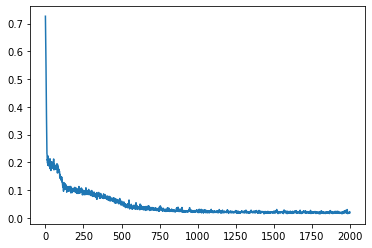

In [7]:
# Loss: convergence or not
plt.plot(history.history['loss'])
plt.show()

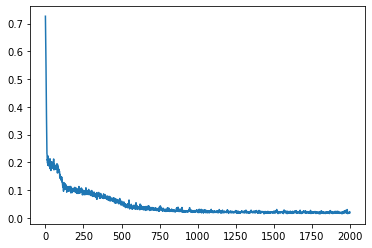

In [8]:
# Loss: convergence or not
plt.plot(history.history['loss'])
plt.show()

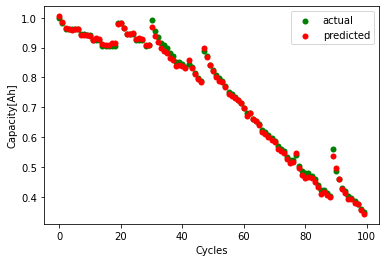

In [9]:
results = model.predict(x_train)
plt.scatter(range(100),y_train,c='g',lw = 0.01,label = 'actual')
plt.scatter(range(100),results,c='r',lw = 0.01,label = 'predicted')
plt.xlabel("Cycles")
plt.ylabel("Capacity[Ah]")
plt.legend()
plt.show()


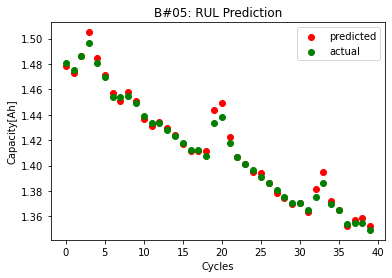

array([[1.4782965],
       [1.4732459],
       [1.4862484],
       [1.5049641],
       [1.4847721],
       [1.471357 ],
       [1.4569824],
       [1.4505997],
       [1.4579973],
       [1.4505757],
       [1.4367833],
       [1.4314759],
       [1.4345137],
       [1.4298766],
       [1.4242975],
       [1.4166254],
       [1.4112123],
       [1.411712 ],
       [1.4118313],
       [1.4440299],
       [1.4493551],
       [1.4227116],
       [1.406928 ],
       [1.4015636],
       [1.394796 ],
       [1.3945162],
       [1.3862697],
       [1.3783838],
       [1.3742566],
       [1.3698591],
       [1.3702682],
       [1.3631244],
       [1.3813753],
       [1.3950883],
       [1.3724717],
       [1.3653803],
       [1.3521627],
       [1.357281 ],
       [1.3584094],
       [1.3520744]], dtype=float32)

In [10]:
results = model.predict(x_test)
plt.scatter(range(40),(results*( 1.8565 -1.2875)+1.2875),c='r',label = 'predicted')
plt.scatter(range(40),(y_test*( 1.8565 -1.2875)+1.2875),c='g',label = 'actual')
plt.xlabel("Cycles")
plt.ylabel("Capacity[Ah]")
plt.title('B#05: RUL Prediction') 
plt.legend()
plt.show()
(results*( 1.8565 -1.2875)+1.2875) # 1.3967008 125

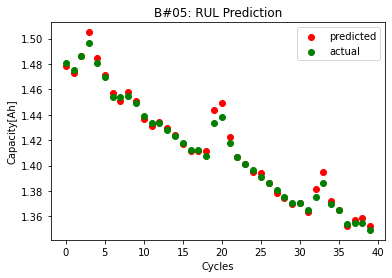

array([[1.4782965],
       [1.4732459],
       [1.4862484],
       [1.5049641],
       [1.4847721],
       [1.471357 ],
       [1.4569824],
       [1.4505997],
       [1.4579973],
       [1.4505757],
       [1.4367833],
       [1.4314759],
       [1.4345137],
       [1.4298766],
       [1.4242975],
       [1.4166254],
       [1.4112123],
       [1.411712 ],
       [1.4118313],
       [1.4440299],
       [1.4493551],
       [1.4227116],
       [1.406928 ],
       [1.4015636],
       [1.394796 ],
       [1.3945162],
       [1.3862697],
       [1.3783838],
       [1.3742566],
       [1.3698591],
       [1.3702682],
       [1.3631244],
       [1.3813753],
       [1.3950883],
       [1.3724717],
       [1.3653803],
       [1.3521627],
       [1.357281 ],
       [1.3584094],
       [1.3520744]], dtype=float32)

In [11]:
results = model.predict(x_test)
plt.scatter(range(40),(results*( 1.8565 -1.2875)+1.2875),c='r',label = 'predicted')
plt.scatter(range(40),(y_test*( 1.8565 -1.2875)+1.2875),c='g',label = 'actual')
plt.xlabel("Cycles")
plt.ylabel("Capacity[Ah]")
plt.title('B#05: RUL Prediction') 
plt.legend()
plt.show()
(results*( 1.8565 -1.2875)+1.2875) # 1.3967008 125

No handles with labels found to put in legend.


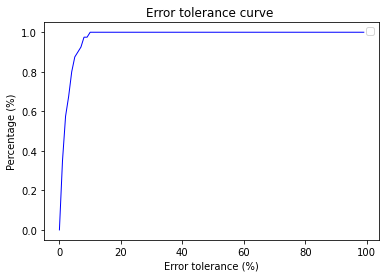

In [12]:
results = model.predict(x_test).reshape(40)
#aa = np.subtract(results,y_test)
tole_y_per_arr = np.arange(100).reshape(100)
y_error = abs((results - y_test)/y_test)
y_error.shape

for i in range (100):
    tole_y_percentage = 0
    for j in range (len(y_error)):
        if y_error[j] <= i/100:
            tole_y_percentage+=1
    tole_y_per_arr[i] = tole_y_percentage
    
plt.plot(range(100),tole_y_per_arr/40,c='b', lw = 1,)
plt.xlabel("Error tolerance (%)")
plt.ylabel("Percentage (%)")
plt.title('Error tolerance curve ') 
plt.legend()
plt.show()   
y_error
tole_y_per_arr_Rnn  = tole_y_per_arr 
# model.save('tole_y_per_arr_.h5') 

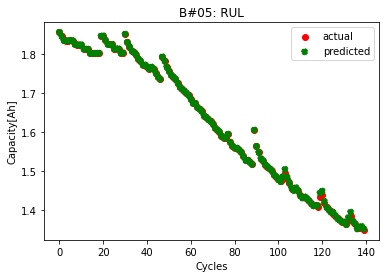

In [13]:
Capacity_all_y = np.append(y_train,y_test)
plt.scatter(range(140),Capacity_all_y*( 1.8565 -1.2875)+1.2875,c='r', lw = 1,label = 'actual')
Capacity_all_y_pre  = np.append(y_train,results)
plt.scatter(range(140),Capacity_all_y_pre*( 1.8565 -1.2875)+1.2875,c='g',lw = 1,linestyle ="--",label = 'predicted')
plt.xlabel("Cycles")
plt.ylabel("Capacity[Ah]")
plt.title('B#05: RUL') 
plt.legend()
plt.show()

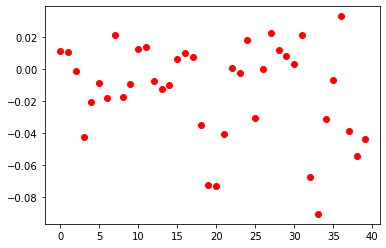

In [14]:
maap = (y_test - results)/y_test

#maap.shape
plt.scatter(range(40),maap,c='r', lw = 1)

In [15]:
# prediction accuracy
maappp = np.mean(abs(y_test - results)/y_test)
maappp

0.023728236678730502

In [16]:
 model.save('B05_RNN_L1_L1_d8d8d1.h5')
#  model = load_model('B05_RNN_L1_L1_d8d8d1.h5')

In [17]:
#  this is  the division line ----------------------------------------------------------------------------------------

In [18]:
#  this is  the division line ----------------------------------------------------------------------------------------

In [19]:
#  this is  the division line ----------------------------------------------------------------------------------------

In [20]:
# DNN as comparison 

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model

In [22]:
## Data 
filenames = 'B0005_data_x_train.csv'
x_train = np.loadtxt('B0005_data_x_train.csv', delimiter=',')
filenames = 'B005_data_y_train.csv'
y_train = np.loadtxt('B005_data_y_train.csv', delimiter=',')

filenames = 'B0005_data_x_test.csv'
x_test = np.loadtxt('B0005_data_x_test.csv', delimiter=',')

filenames = 'B005_data_y_test.csv'
y_test = np.loadtxt('B005_data_y_test.csv', delimiter=',')

x_train = np.array(x_train,dtype =float)
y_train = np.array(y_train,dtype =float)
x_test = np.array(x_test,dtype =float)
y_test = np.array(y_test,dtype =float)

#x_train = x_train.reshape(100,6)
#x_test = x_test.reshape(40,6,1)

In [23]:
# DNN
# # DNN
# model= Sequential()
# model.add(Dense((16),batch_input_shape=(None,6)))
# model.add(Dense((1),batch_input_shape=(None,None)))
# model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
# model.summary()
# # # DNN
# model= Sequential()
# model.add(Dense((1),batch_input_shape=(None,6)))
# model.add(Dense((1),batch_input_shape=(None,None)))
# model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
# model.summary()
# # DNN
model= Sequential()
model.add(Dense((8),batch_input_shape=(None,6)))
model.add(Dense((8),batch_input_shape=(None,6)))
model.add(Dense((8),batch_input_shape=(None,6)))
model.add(Dropout(0.2))
model.add(Dense((1),batch_input_shape=(None,None)))
model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [24]:
history2 = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))
import pickle
with open('w','wb') as f:
    pickle.dump(model,f)

Epoch 1/2000
4/4 [==============================] - 2s 143ms/step - loss: 0.6042 - accuracy: 0.0000e+00 - val_loss: 0.1121 - val_accuracy: 0.0000e+00
Epoch 2/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.4678 - accuracy: 0.0092 - val_loss: 0.0447 - val_accuracy: 0.0000e+00
Epoch 3/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.3571 - accuracy: 0.0061 - val_loss: 0.0347 - val_accuracy: 0.0000e+00
Epoch 4/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.2778 - accuracy: 0.0000e+00 - val_loss: 0.0967 - val_accuracy: 0.0000e+00
Epoch 5/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.2510 - accuracy: 0.0092 - val_loss: 0.1418 - val_accuracy: 0.0000e+00
Epoch 6/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.1986 - accuracy: 0.0000e+00 - val_loss: 0.1622 - val_accuracy: 0.0000e+00
Epoch 7/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.2276 - accuracy: 0.0092 - val_loss: 0.1562

Epoch 57/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.1198 - accuracy: 0.0092 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 58/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0951 - accuracy: 0.0092 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 59/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.1022 - accuracy: 0.0155 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 60/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.1010 - accuracy: 0.0061 - val_loss: 0.0229 - val_accuracy: 0.0000e+00
Epoch 61/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.1098 - accuracy: 0.0040 - val_loss: 0.0203 - val_accuracy: 0.0000e+00
Epoch 62/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.1148 - accuracy: 0.0061 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 63/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.1042 - accuracy: 0.0092 - val_loss: 0.0175 - val

Epoch 113/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.1094 - accuracy: 0.0061 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 114/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0775 - accuracy: 0.0092 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 115/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0881 - accuracy: 0.0092 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 116/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0806 - accuracy: 0.0155 - val_loss: 0.0105 - val_accuracy: 0.0000e+00
Epoch 117/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0938 - accuracy: 0.0155 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 118/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0931 - accuracy: 0.0092 - val_loss: 0.0229 - val_accuracy: 0.0000e+00
Epoch 119/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0981 - accuracy: 0.0061 - val_loss: 0.022

Epoch 169/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0794 - accuracy: 0.0092 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 170/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0897 - accuracy: 0.0155 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 171/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0763 - accuracy: 0.0155 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 172/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0782 - accuracy: 0.0040 - val_loss: 0.0142 - val_accuracy: 0.0000e+00
Epoch 173/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0942 - accuracy: 0.0092 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 174/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0695 - accuracy: 0.0092 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 175/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0829 - accuracy: 0.0061 - val_loss: 0.007

Epoch 225/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0780 - accuracy: 0.0061 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 226/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0785 - accuracy: 0.0061 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 227/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0765 - accuracy: 0.0061 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 228/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0762 - accuracy: 0.0155 - val_loss: 0.0100 - val_accuracy: 0.0000e+00
Epoch 229/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0716 - accuracy: 0.0155 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 230/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0708 - accuracy: 0.0092 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 231/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0730 - accuracy: 0.0061 - val_loss: 0.011

Epoch 281/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0697 - accuracy: 0.0040 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 282/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0597 - accuracy: 0.0092 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 283/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0644 - accuracy: 0.0092 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 284/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0534 - accuracy: 0.0092 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 285/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0623 - accuracy: 0.0061 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 286/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0553 - accuracy: 0.0155 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 287/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0699 - accuracy: 0.0092 - val_loss: 0.010

Epoch 337/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0551 - accuracy: 0.0155 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 338/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0534 - accuracy: 0.0092 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 339/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0455 - accuracy: 0.0155 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 340/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0484 - accuracy: 0.0061 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 341/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0686 - accuracy: 0.0092 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 342/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0632 - accuracy: 0.0061 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 343/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0518 - accuracy: 0.0092 - val_loss: 0.009

Epoch 393/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.0061 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 394/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0403 - accuracy: 0.0061 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 395/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0441 - accuracy: 0.0092 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 396/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0444 - accuracy: 0.0061 - val_loss: 0.0191 - val_accuracy: 0.0000e+00
Epoch 397/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0448 - accuracy: 0.0155 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 398/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0440 - accuracy: 0.0061 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 399/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0504 - accuracy: 0.0092 - val_loss: 0.014

Epoch 449/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0429 - accuracy: 0.0092 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 450/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0446 - accuracy: 0.0092 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 451/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0403 - accuracy: 0.0061 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 452/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0476 - accuracy: 0.0155 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 453/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0392 - accuracy: 0.0092 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 454/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0482 - accuracy: 0.0061 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 455/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.0061 - val_loss: 0.003

Epoch 505/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0400 - accuracy: 0.0092 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 506/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0401 - accuracy: 0.0155 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 507/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.0040 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 508/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0352 - accuracy: 0.0061 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 509/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0403 - accuracy: 0.0155 - val_loss: 0.0144 - val_accuracy: 0.0000e+00
Epoch 510/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0394 - accuracy: 0.0040 - val_loss: 0.0160 - val_accuracy: 0.0000e+00
Epoch 511/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0417 - accuracy: 0.0061 - val_loss: 0.005

Epoch 561/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0337 - accuracy: 0.0092 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 562/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0334 - accuracy: 0.0040 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 563/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0369 - accuracy: 0.0061 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 564/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0424 - accuracy: 0.0061 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 565/2000
4/4 [==============================] - 0s 37ms/step - loss: 0.0363 - accuracy: 0.0092 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 566/2000
4/4 [==============================] - 0s 22ms/step - loss: 0.0346 - accuracy: 0.0155 - val_loss: 0.0137 - val_accuracy: 0.0000e+00
Epoch 567/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0385 - accuracy: 0.0092 - val_loss: 0.006

Epoch 617/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0295 - accuracy: 0.0092 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 618/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0295 - accuracy: 0.0092 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 619/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0296 - accuracy: 0.0155 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 620/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0334 - accuracy: 0.0040 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 621/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0364 - accuracy: 0.0155 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 622/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0299 - accuracy: 0.0092 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 623/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0320 - accuracy: 0.0061 - val_loss: 0.009

Epoch 673/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0314 - accuracy: 0.0155 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 674/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.0155 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 675/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0309 - accuracy: 0.0092 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 676/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.0092 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 677/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0338 - accuracy: 0.0155 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 678/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.0155 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 679/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0306 - accuracy: 0.0155 - val_loss: 0.021

Epoch 729/2000
4/4 [==============================] - 0s 9ms/step - loss: 0.0259 - accuracy: 0.0061 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 730/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0329 - accuracy: 0.0092 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 731/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0307 - accuracy: 0.0092 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 732/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0292 - accuracy: 0.0092 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 733/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0275 - accuracy: 0.0092 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 734/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0324 - accuracy: 0.0155 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 735/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0298 - accuracy: 0.0155 - val_loss: 0.0048

Epoch 785/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0281 - accuracy: 0.0061 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 786/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0312 - accuracy: 0.0061 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 787/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0269 - accuracy: 0.0040 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 788/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0296 - accuracy: 0.0061 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 789/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 0.0155 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 790/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0338 - accuracy: 0.0040 - val_loss: 0.0134 - val_accuracy: 0.0000e+00
Epoch 791/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0295 - accuracy: 0.0061 - val_loss: 0.013

Epoch 841/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0250 - accuracy: 0.0092 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 842/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0300 - accuracy: 0.0061 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 843/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0304 - accuracy: 0.0061 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 844/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0286 - accuracy: 0.0061 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 845/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0315 - accuracy: 0.0092 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 846/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0318 - accuracy: 0.0092 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 847/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0265 - accuracy: 0.0061 - val_loss: 0.002

Epoch 897/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0279 - accuracy: 0.0155 - val_loss: 0.0183 - val_accuracy: 0.0000e+00
Epoch 898/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0209 - accuracy: 0.0061 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 899/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.0272 - accuracy: 0.0155 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 900/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0345 - accuracy: 0.0092 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 901/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0252 - accuracy: 0.0061 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 902/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0291 - accuracy: 0.0155 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 903/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0308 - accuracy: 0.0061 - val_loss: 0.008

Epoch 953/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0320 - accuracy: 0.0155 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 954/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0321 - accuracy: 0.0040 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 955/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0273 - accuracy: 0.0155 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 956/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0291 - accuracy: 0.0061 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 957/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0283 - accuracy: 0.0061 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 958/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0304 - accuracy: 0.0155 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 959/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0292 - accuracy: 0.0155 - val_loss: 0.003

Epoch 1009/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0292 - accuracy: 0.0061 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 1010/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0281 - accuracy: 0.0092 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 1011/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0234 - accuracy: 0.0092 - val_loss: 0.0197 - val_accuracy: 0.0000e+00
Epoch 1012/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0261 - accuracy: 0.0040 - val_loss: 0.0188 - val_accuracy: 0.0000e+00
Epoch 1013/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0276 - accuracy: 0.0061 - val_loss: 0.0189 - val_accuracy: 0.0000e+00
Epoch 1014/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0300 - accuracy: 0.0061 - val_loss: 0.0288 - val_accuracy: 0.0000e+00
Epoch 1015/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0240 - accuracy: 0.0061 - val_loss

4/4 [==============================] - 0s 12ms/step - loss: 0.0281 - accuracy: 0.0092 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 1065/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0303 - accuracy: 0.0092 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 1066/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0264 - accuracy: 0.0155 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 1067/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0299 - accuracy: 0.0155 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 1068/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0250 - accuracy: 0.0061 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 1069/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0315 - accuracy: 0.0061 - val_loss: 0.0341 - val_accuracy: 0.0000e+00
Epoch 1070/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0267 - accuracy: 0.0155 - val_loss: 0.0228 - val_a

4/4 [==============================] - 0s 14ms/step - loss: 0.0250 - accuracy: 0.0092 - val_loss: 0.0270 - val_accuracy: 0.0000e+00
Epoch 1120/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0266 - accuracy: 0.0092 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 1121/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0253 - accuracy: 0.0092 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 1122/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0337 - accuracy: 0.0061 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 1123/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0292 - accuracy: 0.0092 - val_loss: 0.0225 - val_accuracy: 0.0000e+00
Epoch 1124/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0323 - accuracy: 0.0092 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 1125/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0248 - accuracy: 0.0061 - val_loss: 0.0112 - val_a

4/4 [==============================] - 0s 10ms/step - loss: 0.0239 - accuracy: 0.0155 - val_loss: 0.0249 - val_accuracy: 0.0000e+00
Epoch 1175/2000
4/4 [==============================] - 0s 9ms/step - loss: 0.0282 - accuracy: 0.0155 - val_loss: 0.0243 - val_accuracy: 0.0000e+00
Epoch 1176/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0304 - accuracy: 0.0092 - val_loss: 0.0149 - val_accuracy: 0.0000e+00
Epoch 1177/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0257 - accuracy: 0.0155 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 1178/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0268 - accuracy: 0.0155 - val_loss: 0.0162 - val_accuracy: 0.0000e+00
Epoch 1179/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0242 - accuracy: 0.0155 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 1180/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0259 - accuracy: 0.0092 - val_loss: 0.0152 - val_ac

4/4 [==============================] - 0s 16ms/step - loss: 0.0272 - accuracy: 0.0155 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 1230/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0240 - accuracy: 0.0061 - val_loss: 0.0203 - val_accuracy: 0.0000e+00
Epoch 1231/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0207 - accuracy: 0.0061 - val_loss: 0.0167 - val_accuracy: 0.0000e+00
Epoch 1232/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0230 - accuracy: 0.0092 - val_loss: 0.0118 - val_accuracy: 0.0000e+00
Epoch 1233/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0279 - accuracy: 0.0061 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 1234/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0233 - accuracy: 0.0092 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 1235/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0271 - accuracy: 0.0155 - val_loss: 0.0096 - val_a

4/4 [==============================] - 0s 14ms/step - loss: 0.0260 - accuracy: 0.0155 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 1285/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0284 - accuracy: 0.0092 - val_loss: 0.0268 - val_accuracy: 0.0000e+00
Epoch 1286/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0263 - accuracy: 0.0155 - val_loss: 0.0242 - val_accuracy: 0.0000e+00
Epoch 1287/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0278 - accuracy: 0.0061 - val_loss: 0.0351 - val_accuracy: 0.0000e+00
Epoch 1288/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0249 - accuracy: 0.0155 - val_loss: 0.0354 - val_accuracy: 0.0000e+00
Epoch 1289/2000
4/4 [==============================] - 0s 23ms/step - loss: 0.0258 - accuracy: 0.0092 - val_loss: 0.0314 - val_accuracy: 0.0000e+00
Epoch 1290/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0238 - accuracy: 0.0155 - val_loss: 0.0329 - val_a

4/4 [==============================] - 0s 11ms/step - loss: 0.0288 - accuracy: 0.0092 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 1340/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 0.0061 - val_loss: 0.0227 - val_accuracy: 0.0000e+00
Epoch 1341/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0285 - accuracy: 0.0155 - val_loss: 0.0212 - val_accuracy: 0.0000e+00
Epoch 1342/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0267 - accuracy: 0.0061 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 1343/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0254 - accuracy: 0.0092 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 1344/2000
4/4 [==============================] - 0s 9ms/step - loss: 0.0288 - accuracy: 0.0092 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 1345/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0280 - accuracy: 0.0155 - val_loss: 0.0197 - val_ac

4/4 [==============================] - 0s 14ms/step - loss: 0.0286 - accuracy: 0.0061 - val_loss: 0.0224 - val_accuracy: 0.0000e+00
Epoch 1395/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0239 - accuracy: 0.0092 - val_loss: 0.0279 - val_accuracy: 0.0000e+00
Epoch 1396/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0246 - accuracy: 0.0061 - val_loss: 0.0248 - val_accuracy: 0.0000e+00
Epoch 1397/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0291 - accuracy: 0.0061 - val_loss: 0.0272 - val_accuracy: 0.0000e+00
Epoch 1398/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0265 - accuracy: 0.0155 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 1399/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0256 - accuracy: 0.0092 - val_loss: 0.0275 - val_accuracy: 0.0000e+00
Epoch 1400/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0223 - accuracy: 0.0092 - val_loss: 0.0229 - val_a

4/4 [==============================] - 0s 13ms/step - loss: 0.0265 - accuracy: 0.0155 - val_loss: 0.0269 - val_accuracy: 0.0000e+00
Epoch 1450/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0301 - accuracy: 0.0092 - val_loss: 0.0279 - val_accuracy: 0.0000e+00
Epoch 1451/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0289 - accuracy: 0.0061 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 1452/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0293 - accuracy: 0.0092 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 1453/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0215 - accuracy: 0.0155 - val_loss: 0.0272 - val_accuracy: 0.0000e+00
Epoch 1454/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0310 - accuracy: 0.0155 - val_loss: 0.0233 - val_accuracy: 0.0000e+00
Epoch 1455/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0301 - accuracy: 0.0092 - val_loss: 0.0147 - val_a

4/4 [==============================] - 0s 13ms/step - loss: 0.0250 - accuracy: 0.0061 - val_loss: 0.0175 - val_accuracy: 0.0000e+00
Epoch 1505/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0273 - accuracy: 0.0092 - val_loss: 0.0211 - val_accuracy: 0.0000e+00
Epoch 1506/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0255 - accuracy: 0.0155 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 1507/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0262 - accuracy: 0.0092 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 1508/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0246 - accuracy: 0.0092 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 1509/2000
4/4 [==============================] - 0s 9ms/step - loss: 0.0268 - accuracy: 0.0155 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 1510/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0238 - accuracy: 0.0155 - val_loss: 0.0152 - val_ac

4/4 [==============================] - 0s 10ms/step - loss: 0.0292 - accuracy: 0.0061 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 1560/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0228 - accuracy: 0.0061 - val_loss: 0.0163 - val_accuracy: 0.0000e+00
Epoch 1561/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0234 - accuracy: 0.0061 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 1562/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0230 - accuracy: 0.0155 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 1563/2000
4/4 [==============================] - 0s 16ms/step - loss: 0.0281 - accuracy: 0.0061 - val_loss: 0.0254 - val_accuracy: 0.0000e+00
Epoch 1564/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0245 - accuracy: 0.0092 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 1565/2000
4/4 [==============================] - 0s 19ms/step - loss: 0.0244 - accuracy: 0.0155 - val_loss: 0.0165 - val_a

4/4 [==============================] - 0s 13ms/step - loss: 0.0229 - accuracy: 0.0092 - val_loss: 0.0290 - val_accuracy: 0.0000e+00
Epoch 1615/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0214 - accuracy: 0.0061 - val_loss: 0.0284 - val_accuracy: 0.0000e+00
Epoch 1616/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0273 - accuracy: 0.0155 - val_loss: 0.0226 - val_accuracy: 0.0000e+00
Epoch 1617/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0244 - accuracy: 0.0092 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 1618/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0247 - accuracy: 0.0061 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 1619/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0310 - accuracy: 0.0155 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 1620/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0266 - accuracy: 0.0092 - val_loss: 0.0093 - val_a

4/4 [==============================] - 0s 12ms/step - loss: 0.0255 - accuracy: 0.0092 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 1670/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0295 - accuracy: 0.0061 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 1671/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0250 - accuracy: 0.0061 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 1672/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0267 - accuracy: 0.0155 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 1673/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0260 - accuracy: 0.0092 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 1674/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0290 - accuracy: 0.0040 - val_loss: 0.0160 - val_accuracy: 0.0000e+00
Epoch 1675/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0321 - accuracy: 0.0155 - val_loss: 0.0183 - val_a

4/4 [==============================] - 0s 13ms/step - loss: 0.0273 - accuracy: 0.0155 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 1725/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0299 - accuracy: 0.0061 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1726/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0282 - accuracy: 0.0061 - val_loss: 0.0152 - val_accuracy: 0.0000e+00
Epoch 1727/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.0092 - val_loss: 0.0163 - val_accuracy: 0.0000e+00
Epoch 1728/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0247 - accuracy: 0.0061 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 1729/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0280 - accuracy: 0.0061 - val_loss: 0.0241 - val_accuracy: 0.0000e+00
Epoch 1730/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0294 - accuracy: 0.0092 - val_loss: 0.0299 - val_a

4/4 [==============================] - 0s 13ms/step - loss: 0.0281 - accuracy: 0.0061 - val_loss: 0.0353 - val_accuracy: 0.0000e+00
Epoch 1780/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0285 - accuracy: 0.0061 - val_loss: 0.0347 - val_accuracy: 0.0000e+00
Epoch 1781/2000
4/4 [==============================] - 0s 11ms/step - loss: 0.0224 - accuracy: 0.0155 - val_loss: 0.0225 - val_accuracy: 0.0000e+00
Epoch 1782/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.0262 - accuracy: 0.0092 - val_loss: 0.0249 - val_accuracy: 0.0000e+00
Epoch 1783/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0244 - accuracy: 0.0155 - val_loss: 0.0364 - val_accuracy: 0.0000e+00
Epoch 1784/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0315 - accuracy: 0.0155 - val_loss: 0.0285 - val_accuracy: 0.0000e+00
Epoch 1785/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0258 - accuracy: 0.0092 - val_loss: 0.0151 - val_a

4/4 [==============================] - 0s 14ms/step - loss: 0.0259 - accuracy: 0.0092 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 1835/2000
4/4 [==============================] - 0s 13ms/step - loss: 0.0312 - accuracy: 0.0092 - val_loss: 0.0319 - val_accuracy: 0.0000e+00
Epoch 1836/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0241 - accuracy: 0.0155 - val_loss: 0.0366 - val_accuracy: 0.0000e+00
Epoch 1837/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0222 - accuracy: 0.0061 - val_loss: 0.0351 - val_accuracy: 0.0000e+00
Epoch 1838/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0249 - accuracy: 0.0061 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 1839/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0229 - accuracy: 0.0061 - val_loss: 0.0300 - val_accuracy: 0.0000e+00
Epoch 1840/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0244 - accuracy: 0.0092 - val_loss: 0.0222 - val_a

4/4 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.0155 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 1890/2000
4/4 [==============================] - 0s 14ms/step - loss: 0.0305 - accuracy: 0.0061 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 1891/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0327 - accuracy: 0.0155 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 1892/2000
4/4 [==============================] - 0s 9ms/step - loss: 0.0247 - accuracy: 0.0061 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 1893/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0278 - accuracy: 0.0061 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 1894/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0262 - accuracy: 0.0092 - val_loss: 0.0126 - val_accuracy: 0.0000e+00
Epoch 1895/2000
4/4 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 0.0061 - val_loss: 0.0211 - val_ac

4/4 [==============================] - 0s 19ms/step - loss: 0.0252 - accuracy: 0.0092 - val_loss: 0.0287 - val_accuracy: 0.0000e+00
Epoch 1945/2000
4/4 [==============================] - 0s 27ms/step - loss: 0.0215 - accuracy: 0.0155 - val_loss: 0.0331 - val_accuracy: 0.0000e+00
Epoch 1946/2000
4/4 [==============================] - 0s 20ms/step - loss: 0.0224 - accuracy: 0.0061 - val_loss: 0.0357 - val_accuracy: 0.0000e+00
Epoch 1947/2000
4/4 [==============================] - 0s 17ms/step - loss: 0.0266 - accuracy: 0.0061 - val_loss: 0.0340 - val_accuracy: 0.0000e+00
Epoch 1948/2000
4/4 [==============================] - 0s 29ms/step - loss: 0.0217 - accuracy: 0.0092 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 1949/2000
4/4 [==============================] - 0s 28ms/step - loss: 0.0253 - accuracy: 0.0061 - val_loss: 0.0309 - val_accuracy: 0.0000e+00
Epoch 1950/2000
4/4 [==============================] - 0s 21ms/step - loss: 0.0320 - accuracy: 0.0061 - val_loss: 0.0257 - val_a

4/4 [==============================] - 0s 14ms/step - loss: 0.0322 - accuracy: 0.0155 - val_loss: 0.0141 - val_accuracy: 0.0000e+00
Epoch 2000/2000
4/4 [==============================] - 0s 15ms/step - loss: 0.0334 - accuracy: 0.0061 - val_loss: 0.0060 - val_accuracy: 0.0000e+00


TypeError: cannot pickle 'weakref' object

In [ ]:
# import pickle
# with open('w','rb') as f:
#     model = pickle.load(f)

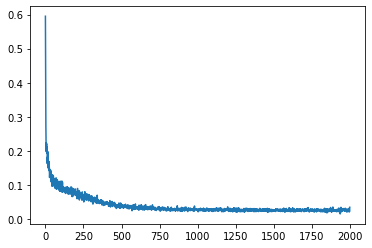

In [25]:
# Loss: convergence or not
plt.plot(history2.history['loss'])
plt.show()

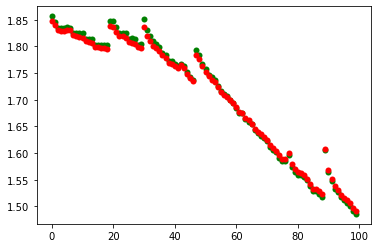

In [26]:
results_d = model.predict(x_train)
plt.scatter(range(100),y_train*( 1.8565 -1.2875)+1.2875,c='g',lw = 0.01)
plt.scatter(range(100),results_d*( 1.8565 -1.2875)+1.2875,c='r',lw = 0.01)
plt.show()

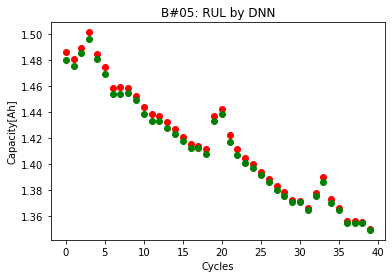

array([[1.4861753],
       [1.4809563],
       [1.4895535],
       [1.5015892],
       [1.4848707],
       [1.474798 ],
       [1.4583083],
       [1.4591247],
       [1.4586879],
       [1.452715 ],
       [1.4437783],
       [1.4382627],
       [1.4370421],
       [1.4324765],
       [1.42707  ],
       [1.4208168],
       [1.4156044],
       [1.4143236],
       [1.4114449],
       [1.4371096],
       [1.44278  ],
       [1.4223751],
       [1.4115368],
       [1.4048553],
       [1.3998091],
       [1.3942646],
       [1.3886596],
       [1.3832369],
       [1.3782378],
       [1.3721477],
       [1.3717   ],
       [1.3663254],
       [1.3775829],
       [1.3903106],
       [1.3732167],
       [1.3659998],
       [1.3565077],
       [1.3562169],
       [1.3554533],
       [1.3499795]], dtype=float32)

In [27]:
results_d = model.predict(x_test)
plt.scatter(range(40),results_d*( 1.8565 -1.2875)+1.2875,c='r',label = 'predicted')
plt.scatter(range(40),y_test*( 1.8565 -1.2875)+1.2875,c='g',label = 'actual')
plt.xlabel("Cycles")
plt.ylabel("Capacity[Ah]")
plt.title('B#05: RUL by DNN') 
plt.show()
results_d*( 1.8565 -1.2875)+1.2875

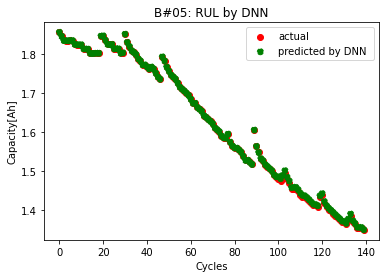

In [28]:
Capacity_all_y = np.append(y_train,y_test)
plt.scatter(range(140),Capacity_all_y*( 1.8565 -1.2875)+1.2875,c='r', lw = 1,label = 'actual')
Capacity_all_y_pre_d  = np.append(y_train,results_d)
plt.scatter(range(140),Capacity_all_y_pre_d*( 1.8565 -1.2875)+1.2875,c='g',lw = 1,linestyle ="--",label = 'predicted by DNN ')
# plt.scatter(range(40),y_test,c='g')
plt.xlabel("Cycles")
plt.ylabel("Capacity[Ah]")
plt.title('B#05: RUL by DNN') 
plt.legend()
plt.show()

In [29]:
model.save('B05_DNN_d8d8d8d1.h5')
# model = load_model('B05_DNN_d8d8d8d1.h5')

No handles with labels found to put in legend.


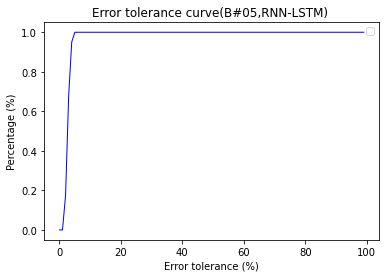

array([0.02967628, 0.03041726, 0.01821454, 0.02618365, 0.02086769,
       0.02746897, 0.02625485, 0.02964404, 0.02164529, 0.02249826,
       0.0335238 , 0.03273455, 0.02472131, 0.03109948, 0.03034495,
       0.02576166, 0.02525214, 0.01362688, 0.031683  , 0.02521054,
       0.02975472, 0.03834564, 0.03777579, 0.0317457 , 0.02807984,
       0.02830369, 0.0241908 , 0.02966698, 0.03371352, 0.01917385,
       0.01383513, 0.02001934, 0.02443606, 0.04214501, 0.04034776,
       0.01518552, 0.03203687, 0.02279926, 0.01049792, 0.01003629])

In [30]:
results = model.predict(x_test).reshape(40)
#aa = np.subtract(results,y_test)
tole_y_per_arr = np.arange(100).reshape(100)
y_error = abs((results - y_test)/y_test)
y_error.shape

for i in range (100):
    tole_y_percentage = 0
    for j in range (len(y_error)):
        if y_error[j] <= i/100:
            tole_y_percentage+=1
    tole_y_per_arr[i] = tole_y_percentage

tole_y_per_arr_Dnn = tole_y_per_arr

plt.plot(range(100),tole_y_per_arr/40,c='b', lw = 1,)
plt.xlabel("Error tolerance (%)")
plt.ylabel("Percentage (%)")
plt.title('Error tolerance curve(B#05,RNN-LSTM) ') 
plt.legend()
plt.show()   
y_error

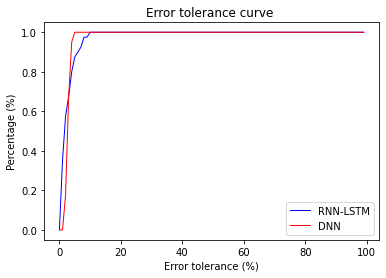

In [31]:
plt.plot(range(100),tole_y_per_arr_Rnn/40,c='b', lw = 1,label = 'RNN-LSTM')
plt.plot(range(100),tole_y_per_arr_Dnn/40,c='r', lw = 1,label = 'DNN')
plt.xlabel("Error tolerance (%)")
plt.ylabel("Percentage (%)")
plt.title('Error tolerance curve ') 
plt.legend()
plt.show()   


In [ ]:
#--------------------------------------CNN-----------------------------------------------------------------------------

In [ ]:
#--------------------------------------LSTM-CNN-----------------------------------------------------------------------------